<a href="https://colab.research.google.com/github/t1mmy89ru/nyu-python-public-policy/blob/master/HW5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm # package for doing statistics

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
df1 = pd.read_csv('https://data.cityofnewyork.us/api/views/3qem-6v3v/rows.csv?accessType=DOWNLOAD', header='infer')
print(df1.head)

<bound method NDFrame.head of     Report Date        Borough  Community District  Adult Family Comm Hotel  \
0    07/31/2018          Bronx                 201                      NaN   
1    07/31/2018          Bronx                 202                      NaN   
2    07/31/2018          Bronx                 203                      NaN   
3    07/31/2018          Bronx                 204                      NaN   
4    07/31/2018          Bronx                 205                      NaN   
5    07/31/2018          Bronx                 206                      NaN   
6    07/31/2018          Bronx                 207                      NaN   
7    07/31/2018          Bronx                 208                      NaN   
8    07/31/2018          Bronx                 209                      NaN   
9    07/31/2018          Bronx                 210                      NaN   
10   07/31/2018          Bronx                 211                      NaN   
11   07/31/2018       

In [7]:
count_shelter = df1[df1['Report Date'] == '09/30/2019'].fillna(0)
print(count_shelter.head)

<bound method NDFrame.head of     Report Date        Borough  Community District  Adult Family Comm Hotel  \
624  09/30/2019          Bronx                 201                      0.0   
625  09/30/2019          Bronx                 202                      0.0   
626  09/30/2019          Bronx                 203                      0.0   
627  09/30/2019          Bronx                 204                      0.0   
628  09/30/2019          Bronx                 205                      0.0   
629  09/30/2019          Bronx                 206                      0.0   
630  09/30/2019          Bronx                 207                      0.0   
631  09/30/2019          Bronx                 208                      0.0   
632  09/30/2019          Bronx                 209                      0.0   
633  09/30/2019          Bronx                 210                      0.0   
634  09/30/2019          Bronx                 211                      0.0   
635  09/30/2019       

In [8]:
shelter_sum = df1[['Adult Family Comm Hotel', 'Adult Family Shelter', 'Adult Shelter', 'Adult Shelter Comm Hotel', 'FWC Cluster', 'FWC Comm Hotel', 'FWC Shelter']]
count_shelter['Total_Shelter'] = shelter_sum.sum(axis=1)
print(count_shelter.head)

<bound method NDFrame.head of     Report Date        Borough  Community District  Adult Family Comm Hotel  \
624  09/30/2019          Bronx                 201                      0.0   
625  09/30/2019          Bronx                 202                      0.0   
626  09/30/2019          Bronx                 203                      0.0   
627  09/30/2019          Bronx                 204                      0.0   
628  09/30/2019          Bronx                 205                      0.0   
629  09/30/2019          Bronx                 206                      0.0   
630  09/30/2019          Bronx                 207                      0.0   
631  09/30/2019          Bronx                 208                      0.0   
632  09/30/2019          Bronx                 209                      0.0   
633  09/30/2019          Bronx                 210                      0.0   
634  09/30/2019          Bronx                 211                      0.0   
635  09/30/2019       

In [0]:
homeless = df[df.complaint_type == 'Homeless Person Assistance']
count_homeless = homeless.groupby('community_board').size().reset_index(name='count_of_homeless_requests')

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

count_homeless['borocd'] = count_homeless.apply(recode_borocd_counts, axis=1)

In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [20]:
count_homeless = count_homeless[count_homeless.borocd.isin(valid_borocds)]
print(len(count_homeless))

59


In [32]:
count_shelter['Community District'] = count_shelter['Community District'].astype(str)
merged_data = pd.merge(left=count_homeless, right=count_shelter, left_on='borocd', right_on='Community District')
merged_data = merged_data.drop_duplicates()
print(merged_data)

     community_board  count_of_homeless_requests borocd Report Date  \
0           01 BRONX                         188    201  09/30/2019   
2        01 BROOKLYN                         338    301  09/30/2019   
3       01 MANHATTAN                         758    101  09/30/2019   
4          01 QUEENS                         254    401  09/30/2019   
5   01 STATEN ISLAND                          41    501  09/30/2019   
6           02 BRONX                          40    202  09/30/2019   
8        02 BROOKLYN                         414    302  09/30/2019   
9          02 QUEENS                         200    402  09/30/2019   
10          03 BRONX                          47    203  09/30/2019   
12       03 BROOKLYN                         262    303  09/30/2019   
13      03 MANHATTAN                         520    103  09/30/2019   
14         03 QUEENS                          98    403  09/30/2019   
15          04 BRONX                         122    204  09/30/2019   
17    

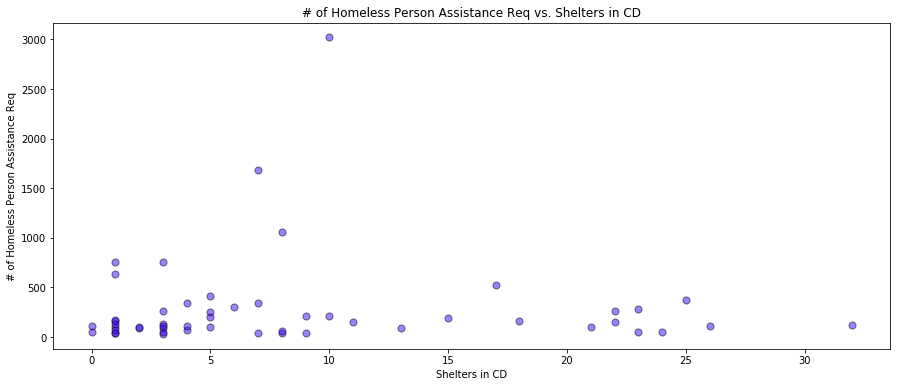

In [33]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.Total_Shelter), # x
    np.array(merged_data.count_of_homeless_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('# of Homeless Person Assistance Req vs. Shelters in CD')
plt.xlabel('Shelters in CD')
plt.ylabel('# of Homeless Person Assistance Req')

plt.show()

In [34]:
# determine the correlation coefficient using the np.corrcoef() function from numpy

x = np.array(merged_data.Total_Shelter)
y = np.array(merged_data.count_of_homeless_requests)

# produces a matrix of the correlation coefficients
np.corrcoef(x, y)

array([[ 1.        , -0.00781267],
       [-0.00781267,  1.        ]])

In [35]:
# Note that y is the first argument, before x. This is different than plotting and the correlation function.

# y = dependent variable (# of 311 requests)
y = np.array(merged_data.count_of_homeless_requests)

# x = independent variable (population) with a constant added
x = np.array(merged_data.Total_Shelter)
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1. 15.]
 [ 1.  7.]
 [ 1.  1.]
 [ 1.  5.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  5.]
 [ 1.  5.]
 [ 1. 23.]
 [ 1. 22.]
 [ 1. 17.]
 [ 1.  5.]
 [ 1. 32.]
 [ 1. 10.]
 [ 1.  8.]
 [ 1.  3.]
 [ 1. 21.]
 [ 1. 18.]
 [ 1. 10.]
 [ 1.  0.]
 [ 1. 26.]
 [ 1.  4.]
 [ 1.  3.]
 [ 1. 13.]
 [ 1.  9.]
 [ 1.  7.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1. 11.]
 [ 1.  1.]
 [ 1.  1.]
 [ 1.  8.]
 [ 1.  2.]
 [ 1.  6.]
 [ 1.  1.]
 [ 1.  3.]
 [ 1. 23.]
 [ 1.  7.]
 [ 1.  0.]
 [ 1. 25.]
 [ 1.  4.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1. 22.]
 [ 1.  1.]
 [ 1.  9.]
 [ 1.  1.]
 [ 1.  3.]
 [ 1.  1.]
 [ 1. 24.]
 [ 1.  4.]
 [ 1.  3.]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                  0.003052
Date:                Thu, 05 Dec 2019   Prob (F-statistic):              0.956
Time:                        05:

In [36]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [291.97710496  -0.44923816]
R2: 6.103776725741028e-05


In [37]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = -0.45x + 291.98; R2 = 0.0


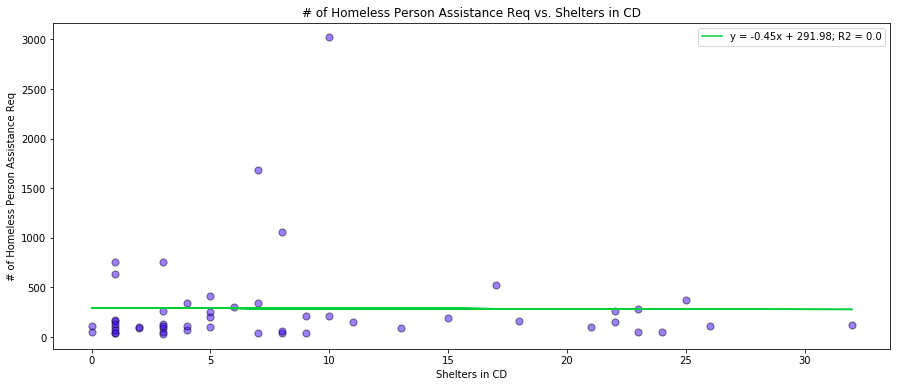

In [38]:
# create an array of x values for the lines of best fit
# x_dummy = np.arange(0,max(cd_data['2010 Population'])/1000)
x_dummy = np.array(merged_data.Total_Shelter)

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data.Total_Shelter), # x
    np.array(merged_data.count_of_homeless_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('# of Homeless Person Assistance Req vs. Shelters in CD')
plt.xlabel('Shelters in CD')
plt.ylabel('# of Homeless Person Assistance Req')
plt.legend()

plt.show()

In [0]:
#There is a slightly negative correlation between the # of homeless assistance requests and the concentration of shelters in a community district. 
#Running the regression, for an increase of 1 shelter, the # of homeless assistance requests drops by .45; 
#this relationship is statistically significant.